# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv


In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [65]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [66]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
data.shape

(7043, 21)

we have 7043 columns and 21 rows as per data 

In [68]:
#Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null in the dataset

In [70]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [71]:
#Lets drop customer id as it has unique value 
data.drop('customerID',axis = 1,inplace = True)

In [72]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


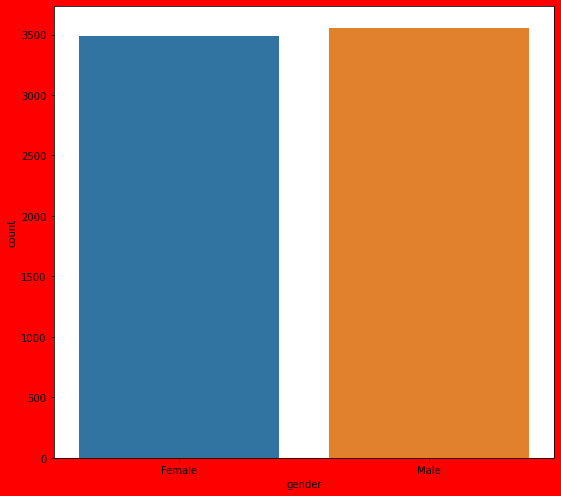

In [73]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['gender']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['gender'])
    plotnumber += 1
plt.tight_layout()

both gender has almost equal number of values

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


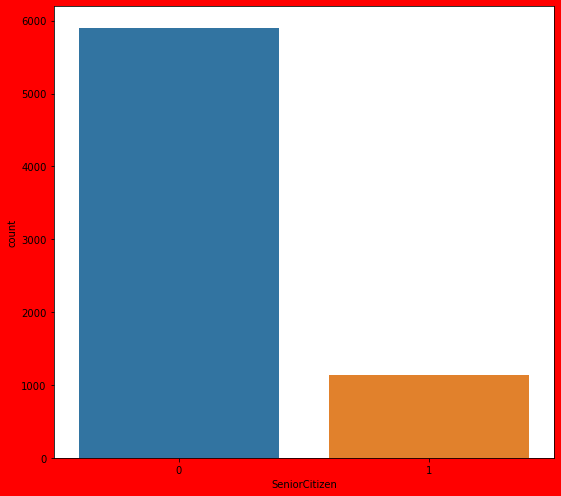

In [74]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['SeniorCitizen']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['SeniorCitizen'])
    plotnumber += 1
plt.tight_layout()
print(data['SeniorCitizen'].value_counts())

There are less senior citizens 

No     3641
Yes    3402
Name: Partner, dtype: int64


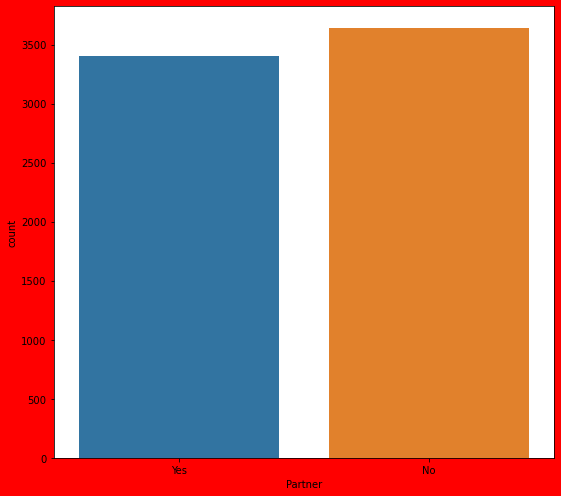

In [75]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Partner']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Partner'])
    plotnumber += 1
plt.tight_layout()
print(data['Partner'].value_counts())

3402 customers have a partner and 3641 customers do not have a partner

No     4933
Yes    2110
Name: Dependents, dtype: int64


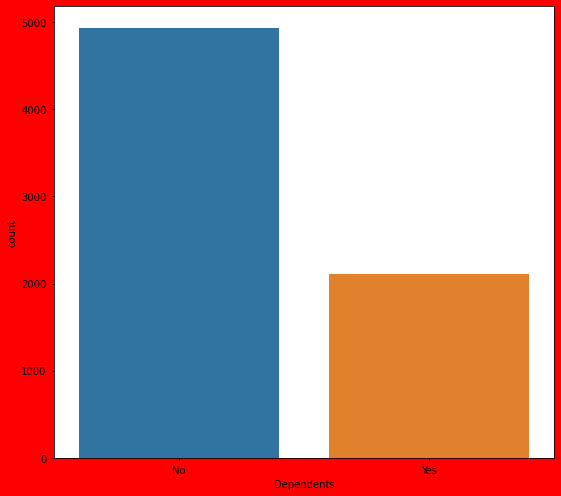

In [76]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Dependents']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Dependents'])
    plotnumber += 1
plt.tight_layout()
print(data['Dependents'].value_counts())

4993 have dependency and 2110 doesnt have dependency 

Yes    6361
No      682
Name: PhoneService, dtype: int64


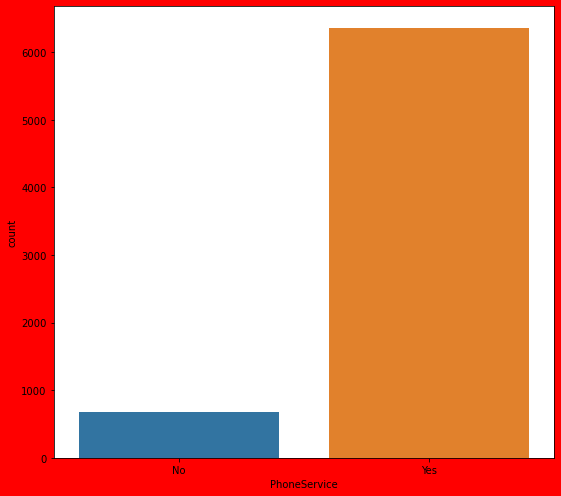

In [77]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['PhoneService']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['PhoneService'])
    plotnumber += 1
plt.tight_layout()
print(data['PhoneService'].value_counts())

 6361 customers have a phone service but 682 customers do not have a phone service 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


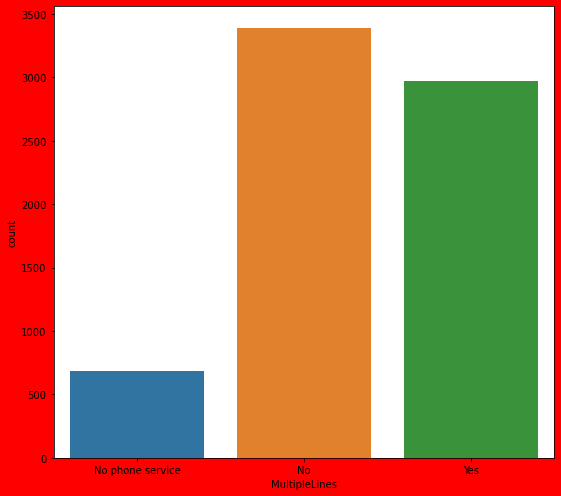

In [79]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['MultipleLines']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['MultipleLines'])
    plotnumber += 1
plt.tight_layout()
print(data['MultipleLines'].value_counts())

2971 customers have multiple line service
* 700 have no phone service
* 3390 customers do not have multiple line service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


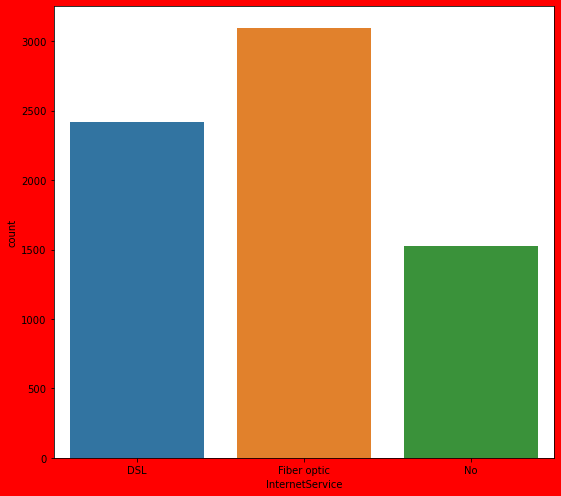

In [80]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['InternetService']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['InternetService'])
    plotnumber += 1
plt.tight_layout()
print(data['InternetService'].value_counts())

 2421 have DSL Service
* 1526 have no Internet Service
*3096 customers have fibre optic Internet Service,

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


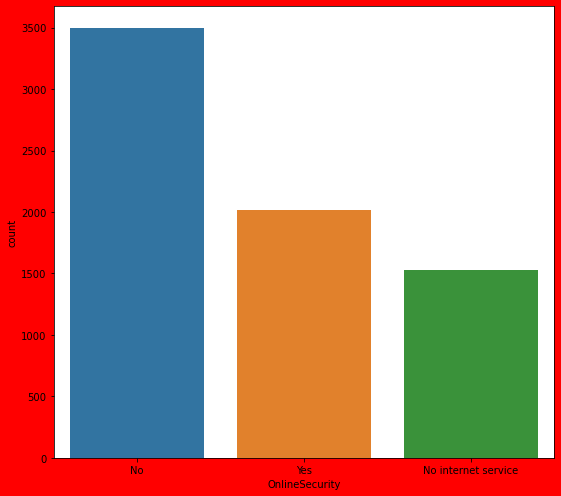

In [81]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['OnlineSecurity']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['OnlineSecurity'])
    plotnumber += 1
plt.tight_layout()
print(data['OnlineSecurity'].value_counts())

3495 customers have no Online Security,2019 have Online security ,1526 have no Internet Service.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


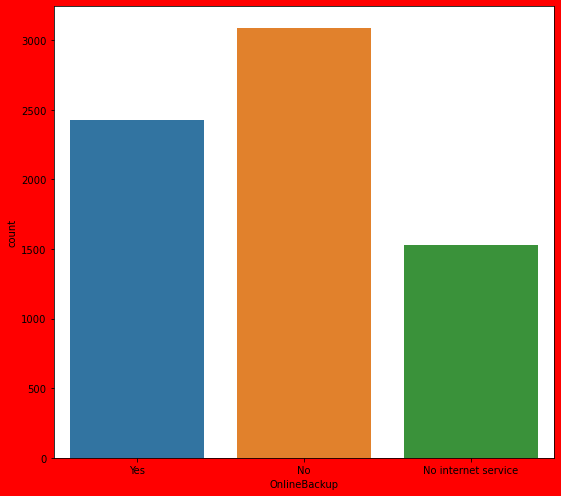

In [82]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['OnlineBackup']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['OnlineBackup'])
    plotnumber += 1
plt.tight_layout()
print(data['OnlineBackup'].value_counts())

 3088 have no Online Backup,2429 customers have online backup and 1526 have no Internet Service

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


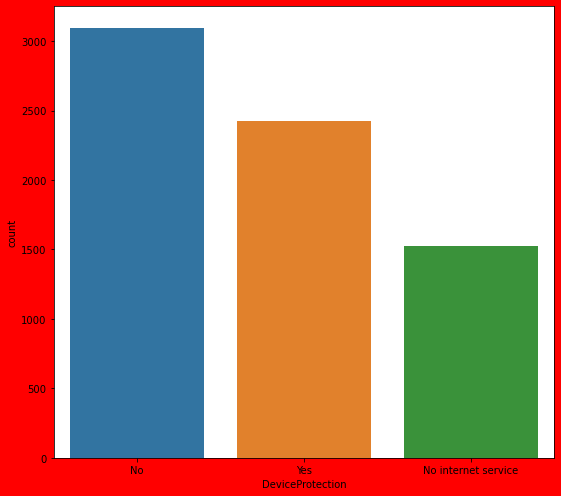

In [83]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['DeviceProtection']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['DeviceProtection'])
    plotnumber += 1
plt.tight_layout()
print(data['DeviceProtection'].value_counts())

3095 customers do not have any Device Protection, 2422 have Device Protection and 1526 have no Internet Service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


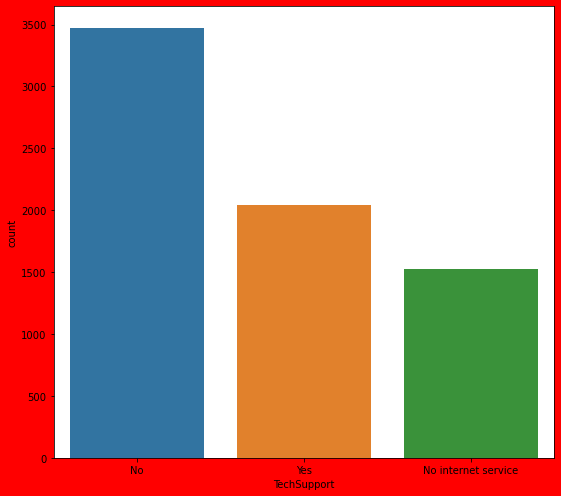

In [85]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['TechSupport']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['TechSupport'])
    plotnumber += 1
plt.tight_layout()
print(data['TechSupport'].value_counts())

3473 customers have no Tech Support, 2044 have Tech Support and 1526 have no Internet Service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


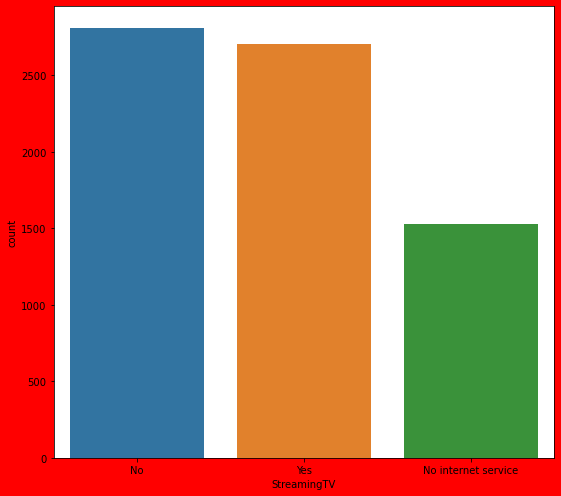

In [86]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['StreamingTV']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['StreamingTV'])
    plotnumber += 1
plt.tight_layout()
print(data['StreamingTV'].value_counts())

2810 customers do not have Streaming TV, 2707 have Streaming TV and 1526 have no Internet Service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


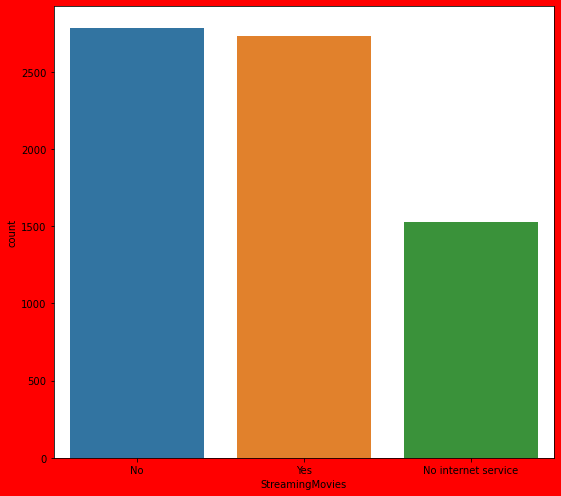

In [87]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['StreamingMovies']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['StreamingMovies'])
    plotnumber += 1
plt.tight_layout()
print(data['StreamingMovies'].value_counts())

2785 customers do not have Streaming Movies, 2732 have Streaming Movies and 1526 have no Internet Service

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


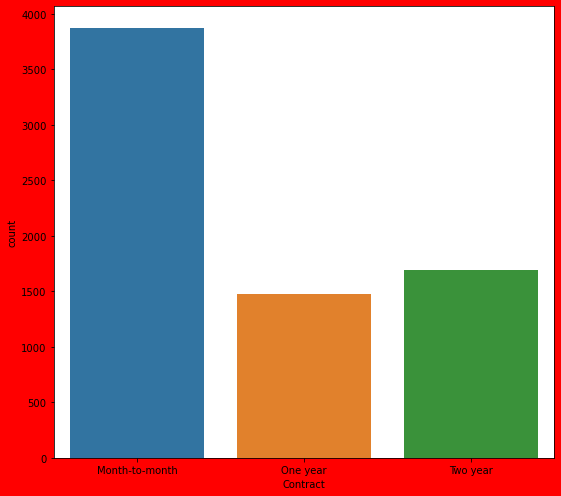

In [88]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Contract']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Contract'])
    plotnumber += 1
plt.tight_layout()
print(data['Contract'].value_counts())

3875 customers have a contract on month to month basis, 1695 have an yearly based contract and 1473 have contracts for 2 years

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


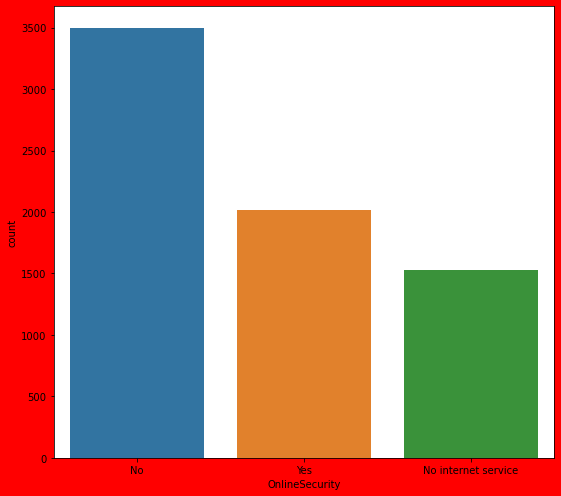

In [89]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['OnlineSecurity']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['OnlineSecurity'])
    plotnumber += 1
plt.tight_layout()
print(data['OnlineSecurity'].value_counts())

3498 customers dont have online security and 2019 customers  doesnt have online security and 1526 have no Internet Service

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


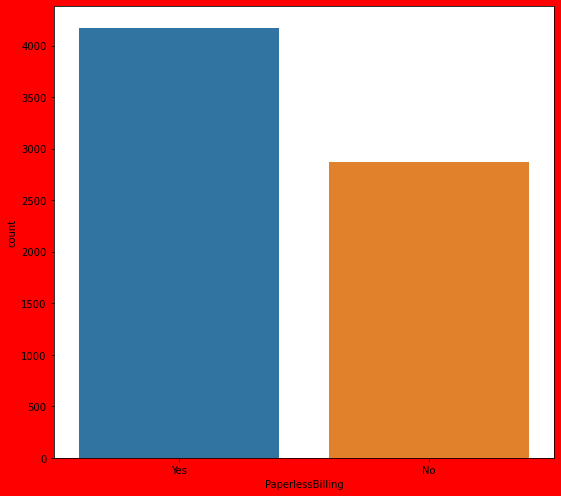

In [90]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['PaperlessBilling']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['PaperlessBilling'])
    plotnumber += 1
plt.tight_layout()
print(data['PaperlessBilling'].value_counts())

4171 customers have a Paperless billing and only 2872 customers do not have a Paperless billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


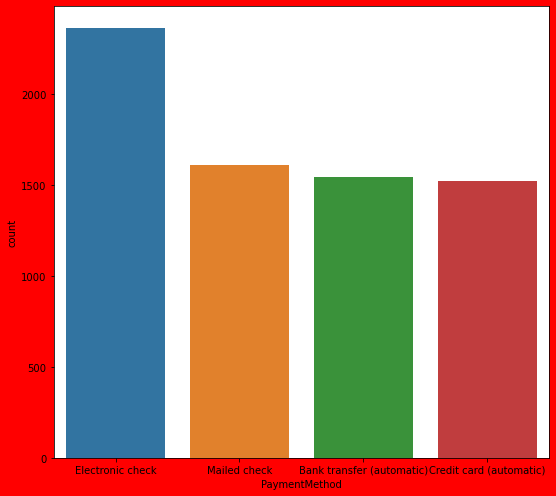

In [91]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['PaymentMethod']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['PaymentMethod'])
    plotnumber += 1
plt.tight_layout()
print(data['PaymentMethod'].value_counts())

2365 customers make Payments through electronic check and 1612 customers make payments via Mail Check,1544 through Bank Transfer and 1522 through Credit Card each

No     5174
Yes    1869
Name: Churn, dtype: int64


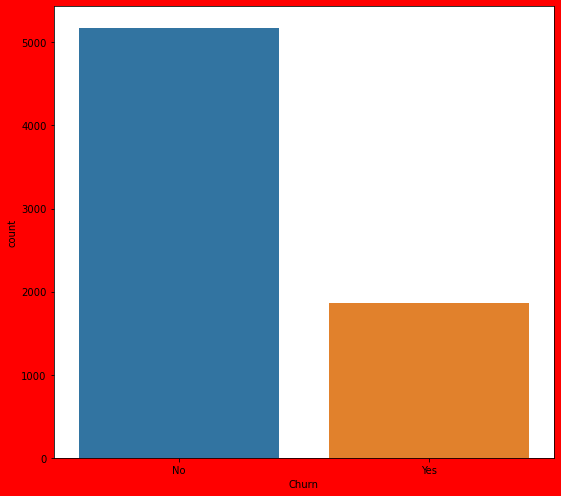

In [92]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['Churn']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.countplot(data['Churn'])
    plotnumber += 1
plt.tight_layout()
print(data['Churn'].value_counts())

5174 customer's churn is no, only 1869 customer's churn is Yes

In [93]:
data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [94]:
data.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [95]:
data.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

We see 11 blank spaces 

In [96]:
#replacing the data
data.TotalCharges.replace(' ',np.nan,inplace=True)

In [97]:
data.TotalCharges.isnull().sum()

11

In [98]:
#As the data is discreate we gonna use median here 
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [99]:
#covert into float 
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [100]:
#Lets check now
data.TotalCharges.value_counts()


1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: TotalCharges, Length: 6531, dtype: int64

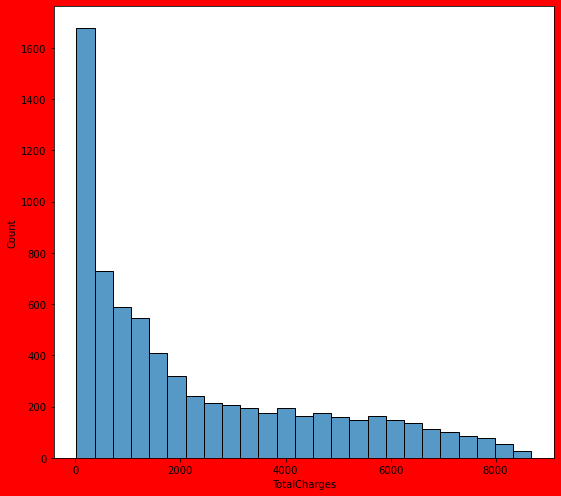

In [101]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['TotalCharges']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.histplot(data['TotalCharges'])
    plotnumber += 1
plt.tight_layout()


Total charges between 0-2000 have more customers

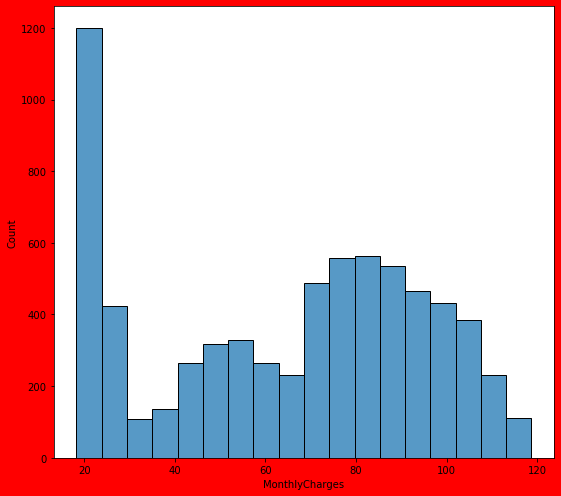

In [102]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['MonthlyCharges']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.histplot(data['MonthlyCharges'])
    plotnumber += 1
plt.tight_layout()


Monthly charges bewteen 0-20 have more customers

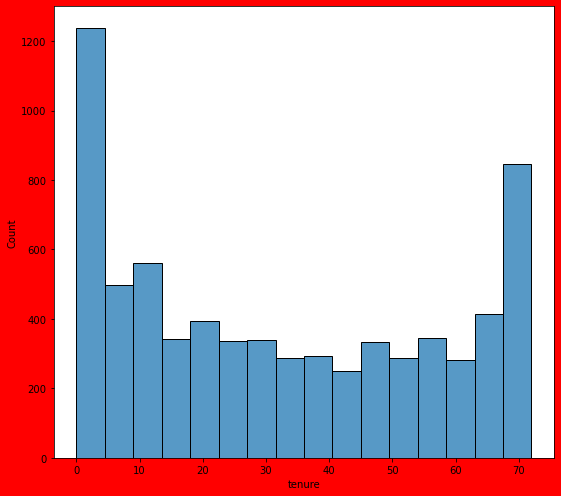

In [103]:
plt.figure(figsize = (15,7), facecolor = 'red')
plotnumber = 1

for column in data['tenure']:
    if plotnumber <=1:
        ax = plt.subplot(1,2,plotnumber)
        sns.histplot(data['tenure'])
    plotnumber += 1
plt.tight_layout()


Tenure between 0-20 there are lot of customers

In [104]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [105]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes']])
df1=ord_enc.fit_transform(data[['Churn']])
print(df1)
data['Churn']=df1

[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [106]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [107]:
ord_enc=OrdinalEncoder(categories=[['Female', 'Male']])
df1=ord_enc.fit_transform(data[['gender']])
print(df1)
data['gender']=df1

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]


In [108]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [109]:
ord_enc=OrdinalEncoder(categories=[['Yes', 'No']])
df1=ord_enc.fit_transform(data[['Partner']])
print(df1)
data['Partner']=df1

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [110]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [111]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes']])
df1=ord_enc.fit_transform(data[['Dependents']])
print(df1)
data['Dependents']=df1

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [112]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes']])
df1=ord_enc.fit_transform(data[['PhoneService']])
print(df1)
data['PhoneService']=df1

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]


In [114]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [115]:
ord_enc=OrdinalEncoder(categories=[['DSL', 'Fiber optic', 'No']])
df1=ord_enc.fit_transform(data[['InternetService']])
print(df1)
data['InternetService']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [116]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [117]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes', 'No internet service']])
df1=ord_enc.fit_transform(data[['OnlineSecurity']])
print(df1)
data['OnlineSecurity']=df1

[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [118]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [119]:
ord_enc=OrdinalEncoder(categories=[['Yes', 'No', 'No internet service']])
df1=ord_enc.fit_transform(data[['OnlineBackup']])
print(df1)
data['OnlineBackup']=df1

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [120]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [121]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes', 'No internet service']])
df1=ord_enc.fit_transform(data[['DeviceProtection']])
print(df1)
data['DeviceProtection']=df1

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [122]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [123]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes', 'No internet service']])
df1=ord_enc.fit_transform(data[['TechSupport']])
print(df1)
data['TechSupport']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [124]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [125]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes', 'No internet service']])
df1=ord_enc.fit_transform(data[['StreamingTV']])
print(df1)
data['StreamingTV']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [126]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [127]:
ord_enc=OrdinalEncoder(categories=[['No', 'Yes', 'No internet service']])
df1=ord_enc.fit_transform(data[['StreamingMovies']])
print(df1)
data['StreamingMovies']=df1

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [128]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [129]:
ord_enc=OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df1=ord_enc.fit_transform(data[['Contract']])
print(df1)
data['Contract']=df1

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [2.]]


In [130]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [131]:
ord_enc=OrdinalEncoder(categories=[['Yes', 'No']])
df1=ord_enc.fit_transform(data[['PaperlessBilling']])
print(df1)
data['PaperlessBilling']=df1

[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [132]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [133]:
ord_enc=OrdinalEncoder(categories=[['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)']])
df1=ord_enc.fit_transform(data[['PaymentMethod']])
print(df1)
data['PaymentMethod']=df1

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [2.]]


In [137]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [138]:
ord_enc=OrdinalEncoder(categories=[['No phone service', 'No', 'Yes']])
df1=ord_enc.fit_transform(data[['MultipleLines']])
print(df1)
data['MultipleLines']=df1

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [2.]
 [1.]]


In [139]:
data.dtypes

gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [140]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(float)
data['tenure'] = data['tenure'].astype(float)

In [141]:
data.dtypes

gender              float64
SeniorCitizen       float64
Partner             float64
Dependents          float64
tenure              float64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [142]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.516967,0.299588,32.371149,0.903166,1.325004,0.872923,0.720006,0.871788,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,0.738369,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


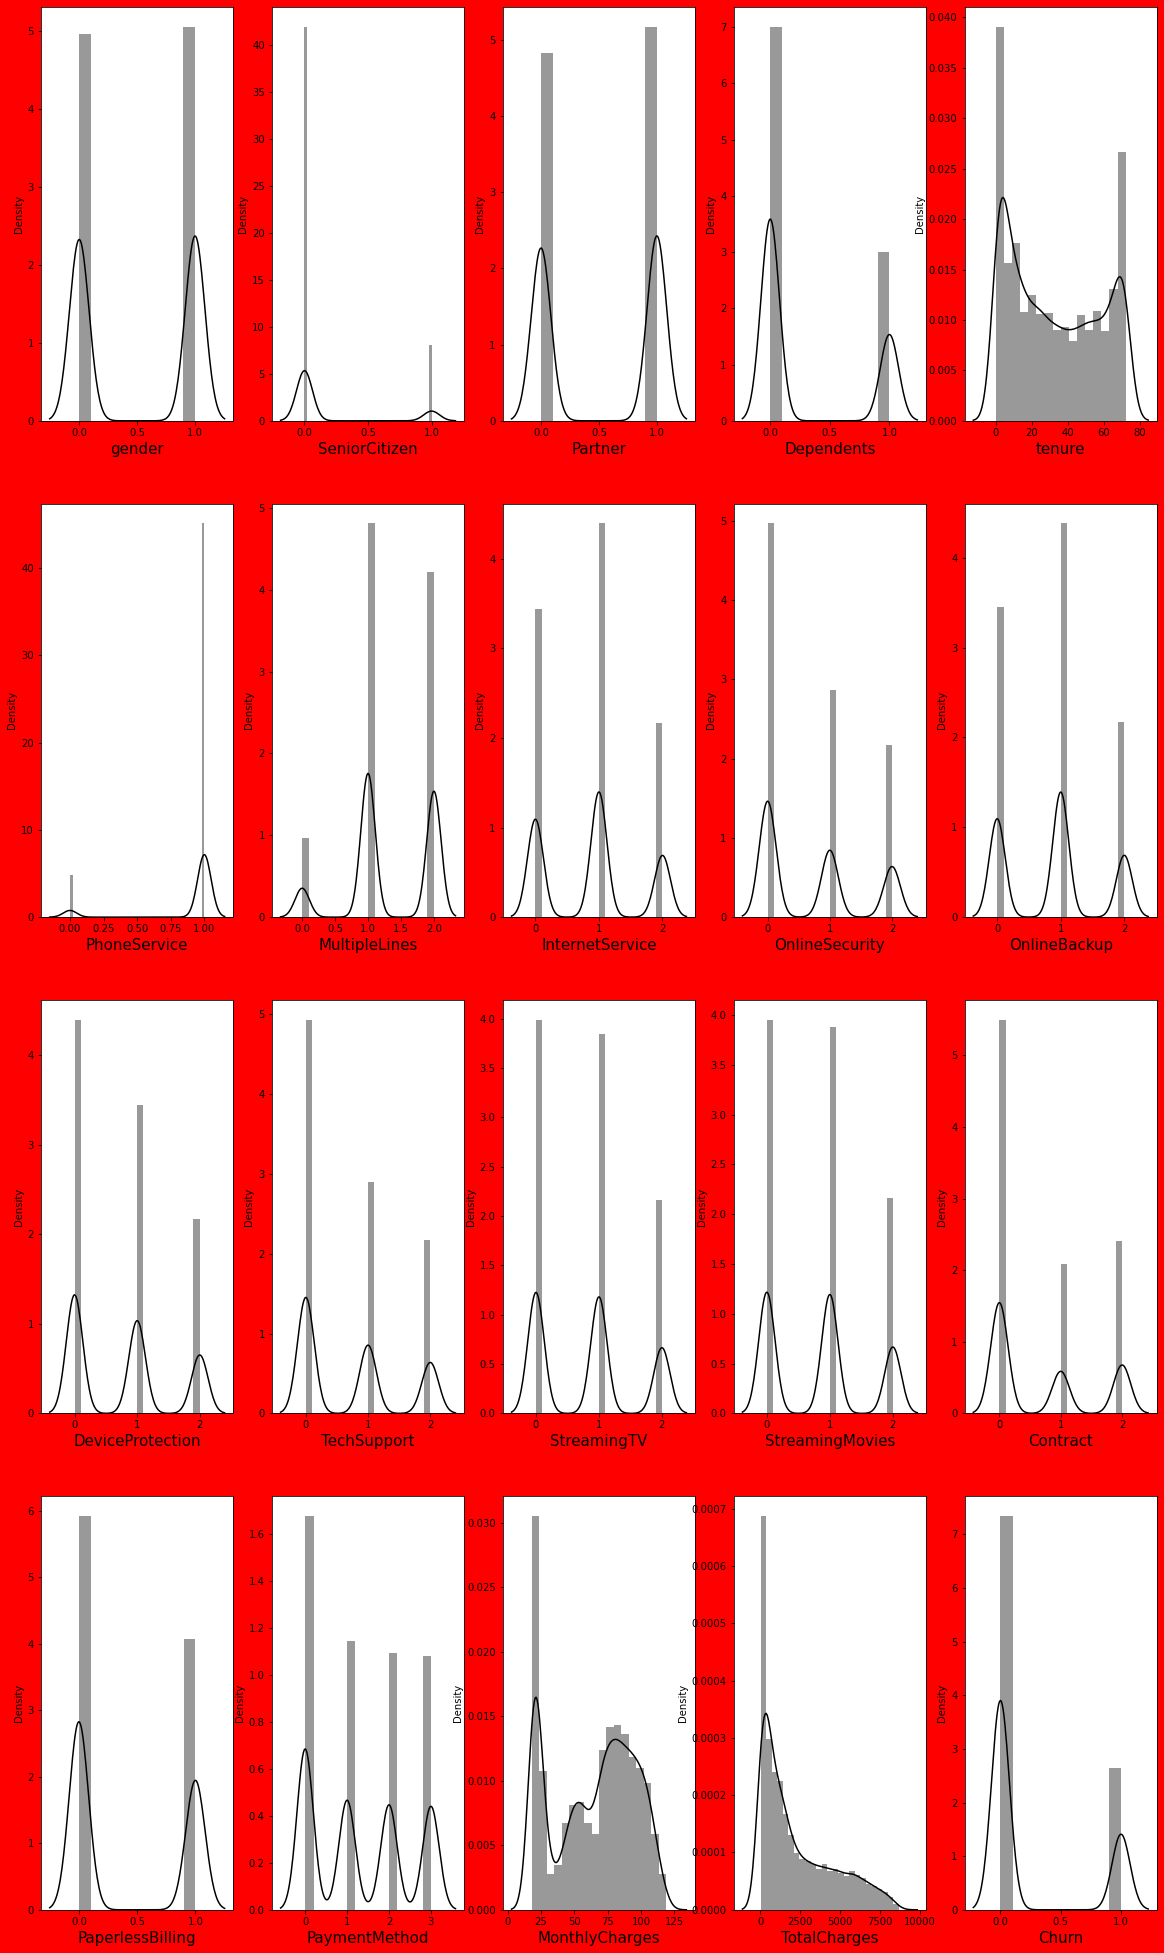

In [144]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

we see in features('tenure','MonthlyCharges', 'TotalCharges')data is skwewd 

In [145]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner            -0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines      -0.422184
InternetService     0.205423
OnlineSecurity      0.544240
OnlineBackup        0.207678
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.630959
PaperlessBilling    0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

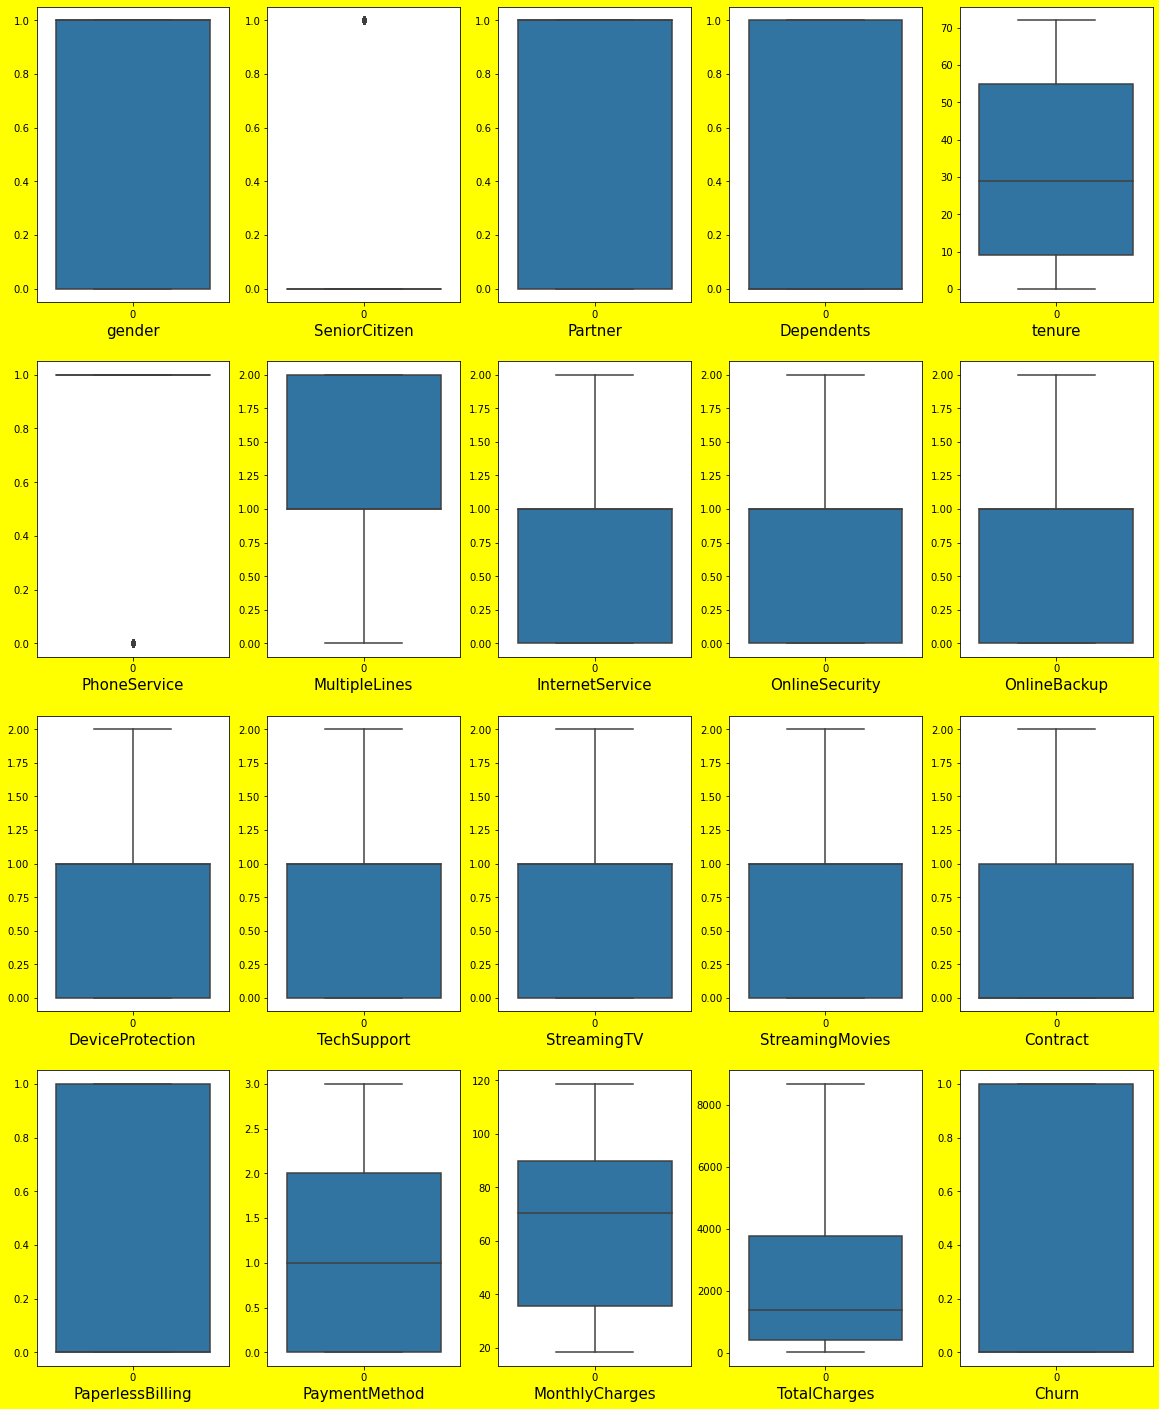

In [146]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1
for column in data:
    if graph<=20:
        plt.subplot(4,5,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

There are no outliers 

# SkWENESS removing 

In [148]:
scaler=PowerTransformer(method='yeo-johnson')

In [149]:
data[['tenure','MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure','MonthlyCharges', 'TotalCharges']].values)

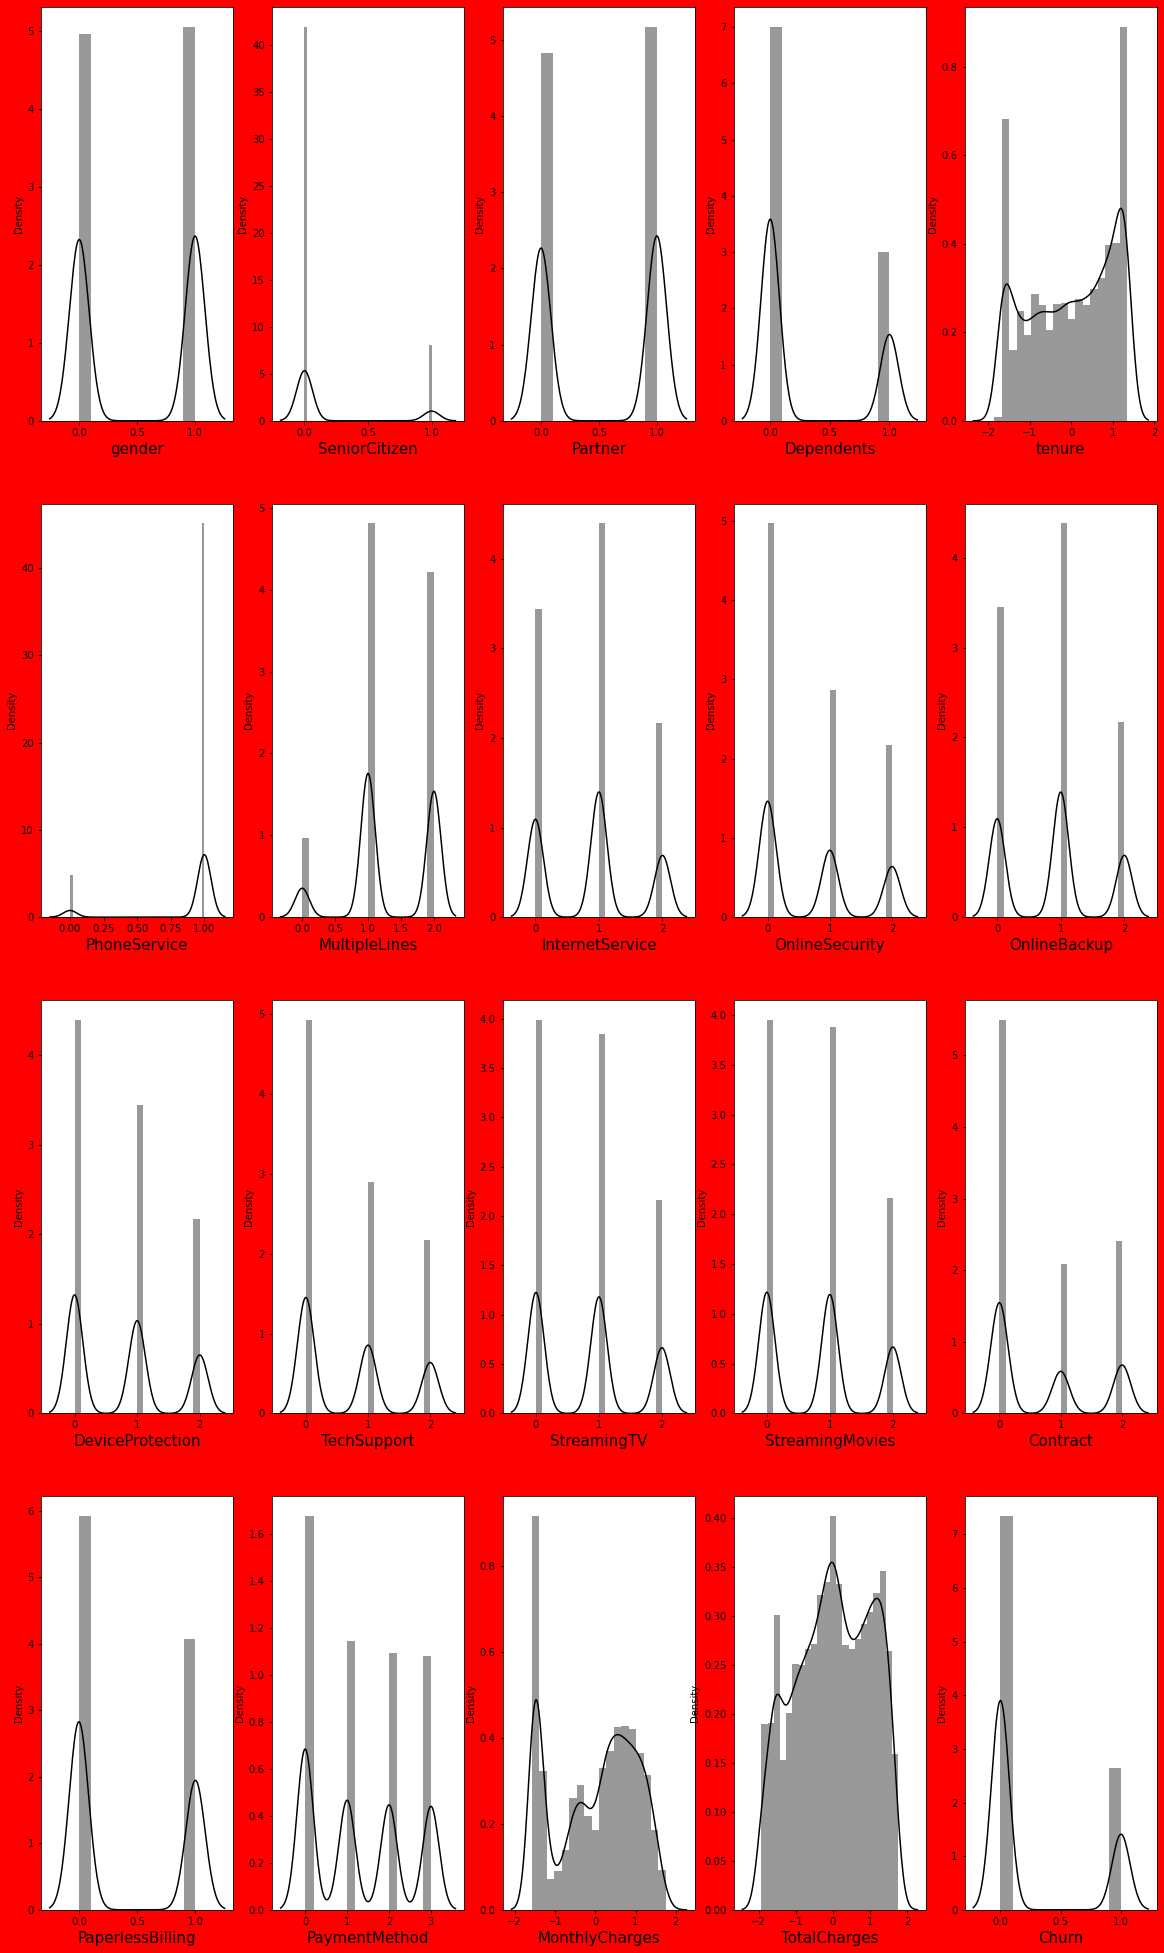

In [150]:
plt.figure(figsize = (20,35), facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <=20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column], color = 'black')
        plt.xlabel(column,fontsize=15)
        
    plotnumber +=1
plt.show()

Now Its far better than before 

In [152]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner            -0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines      -0.422184
InternetService     0.205423
OnlineSecurity      0.544240
OnlineBackup        0.207678
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.630959
PaperlessBilling    0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.259035
TotalCharges       -0.144337
Churn               1.063031
dtype: float64

As both SeniorCitizen & PhoneService are binary data , so we can leave it 
Churn is output 

In [154]:
scaler=StandardScaler()
X=data.drop('Churn',axis=1)

In [155]:
x = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [158]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.001248,gender
1,1.150412,SeniorCitizen
2,1.458692,Partner
3,1.381522,Dependents
4,31.907932,tenure
5,2.389479,PhoneService
6,2.545279,MultipleLines
7,3.710869,InternetService
8,3.940469,OnlineSecurity
9,3.779543,OnlineBackup


We can see multicolinearity in MonthlyCharges and tenure

In [163]:
scaler=StandardScaler()
X=data.drop('Churn',axis=1)
X_scaled=scaler.fit_transform(X)

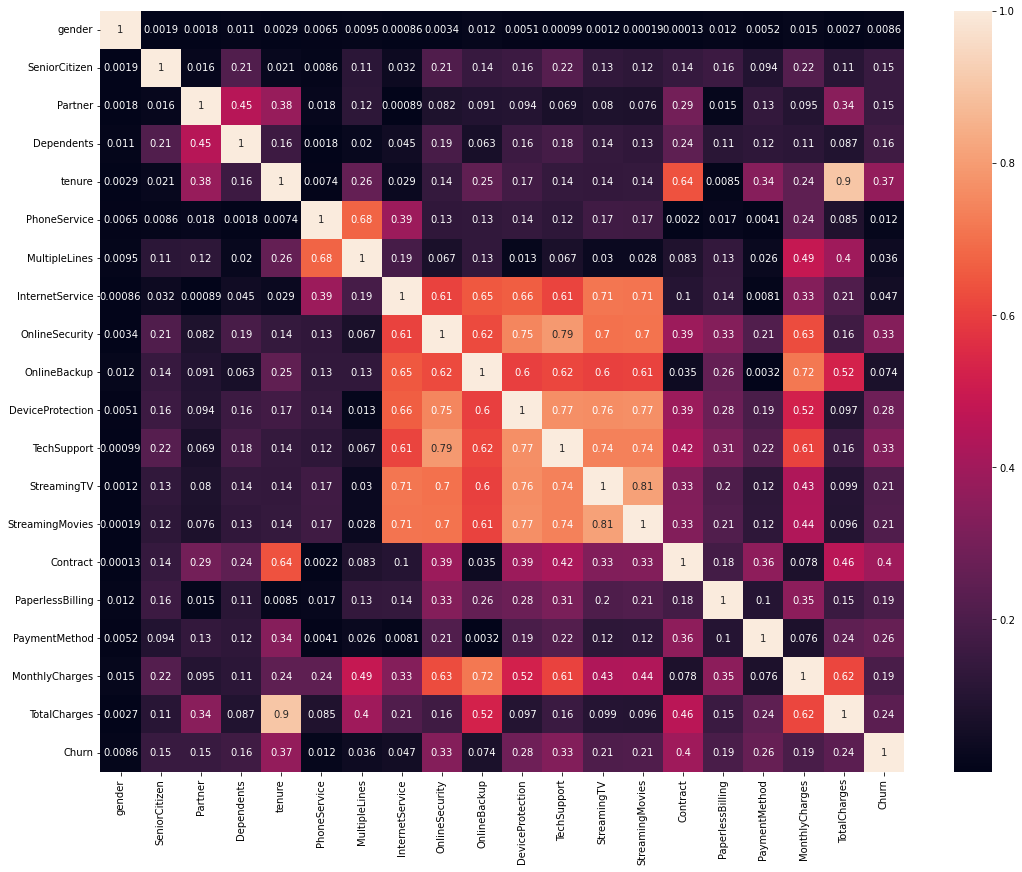

In [164]:
data_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

we can see there is multicolinearity even in heatmap so we gonna use PCA which will handle multicolinearity 

# PCA

In [165]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-2.49725471e+00,  3.34869704e+00,  2.87727384e+00, ...,
         1.86306358e-02, -6.45256994e-01, -2.10182507e-02],
       [-8.92324026e-01,  4.17562595e-01,  7.83529501e-01, ...,
        -2.50976437e-01,  3.73198196e-01,  3.55119435e-02],
       [-2.14166174e+00,  2.30231805e+00,  3.87096767e-02, ...,
        -1.75392497e-01, -3.19579148e-01, -7.16422414e-02],
       ...,
       [-1.49042974e+00,  2.32034366e+00,  3.46777533e+00, ...,
        -6.69597775e-02,  3.25143943e-01,  8.52169747e-02],
       [-2.23320558e+00,  1.02419922e+00, -1.68598637e+00, ...,
         5.18796854e-02,  3.12666932e-02,  1.32006416e-02],
       [ 2.92637538e-01, -1.95814884e+00, -4.03948330e-02, ...,
         2.56793190e-02,  9.49325236e-01, -1.70073331e-03]])

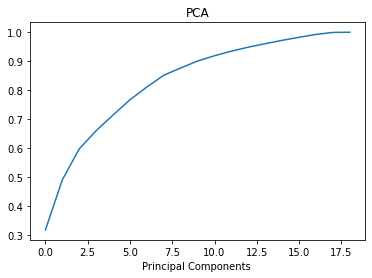

In [166]:
#lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumsum=cummulative summention
plt.xlabel('Principal Components ')
plt.title('PCA')
plt.show()
#explained_variance_ratio_ = how much data variance u can explain if ur using on component 
#cumsum = it will increase its value by adding one + another data then another and so on 

we can achieve 95% at 15 columns 

In [167]:
pca=PCA(n_components=15)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-2.497255,3.348697,2.877274,-0.211731,1.441458,1.231824,-0.759387,-0.307238,-1.215337,-0.603016,0.800751,-0.248333,-0.579019,-0.163955,-0.802827
1,-0.892324,0.417563,0.783530,0.496556,-1.452387,-1.173192,0.756429,-0.833025,0.366075,-0.793862,-0.556058,-0.142656,0.459805,-0.765528,0.322415
2,-2.141662,2.302318,0.038710,-0.184540,-0.801750,-0.978910,-0.650288,0.513691,0.320234,-0.768008,0.628753,-1.206840,0.104271,0.196248,-0.382387
3,-0.374940,1.053276,3.788098,1.889989,-0.554324,-1.067029,0.308435,-0.521636,0.000734,0.000468,-0.855770,-0.108881,-0.112354,-0.549655,-0.438242
4,-1.988881,2.592622,-0.909444,-0.377535,-0.374533,1.011139,-0.705783,-0.185910,0.129026,-0.478990,0.116770,0.447988,0.726169,-0.171504,-0.301057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.094202,-1.307406,-0.039985,-1.695232,0.485117,-0.878375,-0.770118,0.130486,0.501697,-0.403841,0.369461,-0.292718,-1.068626,0.113912,0.494203
7039,-0.945739,-3.350705,-0.054771,-0.895922,-0.027535,1.063609,-0.747371,0.895268,-0.117917,1.323191,-0.045682,0.381464,-0.143938,-0.523129,0.058179
7040,-1.490430,2.320344,3.467775,-1.330423,1.864018,1.272658,-0.811339,-0.190292,0.068499,-0.384824,-0.879283,-0.126974,-0.303449,0.188923,-0.807289
7041,-2.233206,1.024199,-1.685986,-0.408065,1.611706,-0.890990,1.250865,1.380023,-0.369063,-1.062109,0.218582,0.412307,-0.300218,-0.078074,-0.560596


In [168]:
y=data['Churn']

In [170]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [171]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

In [173]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [174]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n===============Train Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        
        print('\n===============Test Reasult=============')
        print(f'Accuracy SCore :{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [176]:
from sklearn.svm import SVC
svc=SVC()
#svc model training and printing train and test score 
svc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :81.86%

===============Test Reasult=============
Accuracy SCore :80.18%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1279
         1.0       0.71      0.46      0.56       482

    accuracy                           0.80      1761
   macro avg       0.77      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [192]:
SVC_CVS=cross_val_score(svc,X_scaled,y,cv=10).mean()
SVC_CVS

0.8033498549323017

In [178]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lr model training and printing train and test score 
lr.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :80.69%

===============Test Reasult=============
Accuracy SCore :80.81%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1279
         1.0       0.69      0.54      0.61       482

    accuracy                           0.81      1761
   macro avg       0.77      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [225]:
lr_CSV=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_CSV

0.8069011508807019

In [180]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
#DTC model training and printing train and test score 
DTC.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(DTC,x_train,x_test,y_train,y_test,train=True)
print_score(DTC,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :99.79%

===============Test Reasult=============
Accuracy SCore :72.46%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1279
         1.0       0.50      0.49      0.49       482

    accuracy                           0.72      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.72      0.72      0.72      1761



In [196]:
DTC_csv=cross_val_score(DTC,X_scaled,y,cv=10).mean()
DTC_csv

0.7310811573178594

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#knn model training and printing train and test score 
knn.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(knn,x_train,x_test,y_train,y_test,train=True)
print_score(knn,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :83.64%

===============Test Reasult=============
Accuracy SCore :77.17%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1279
         1.0       0.60      0.49      0.54       482

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.76      0.77      0.76      1761



In [197]:
knn_csv=cross_val_score(knn,X_scaled,y,cv=10).mean()
knn_csv

0.7718284574468084

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#knn model training and printing train and test score 
rfc.fit(x_train,y_train)
#call the function and pass dataset to check train and test score 
print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :99.79%

===============Test Reasult=============
Accuracy SCore :78.42%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1279
         1.0       0.66      0.45      0.53       482

    accuracy                           0.78      1761
   macro avg       0.73      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



In [198]:
rfc_csv=cross_val_score(rfc,X_scaled,y,cv=10).mean()
rfc_csv

0.7945426337846551

In [222]:
from sklearn.ensemble import GradientBoostingClassifier

In [226]:
gbdt = GradientBoostingClassifier() 
gbdt.fit(x_train,y_train) 
print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)


===============Train Reasult=============
Accuracy SCore :83.98%

===============Test Reasult=============
Accuracy SCore :79.84%


 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1279
         1.0       0.69      0.48      0.57       482

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [227]:
gbdt_csv=cross_val_score(gbc,X_scaled,y,cv=10).mean()
gbdt_csv

0.805620970341715

In [228]:
#Cross validation score 
print('********* Cross Validation Score*********')
print('knn_csv --> ',knn_csv)
print('DTC_csv --> ',DTC_csv)
print('gbdt_CSV --> ',gbdt_csv)
print('SVC_CVS --> ',SVC_CVS)
print('rfc_csv --> ',rfc_csv)

********* Cross Validation Score*********
knn_csv -->  0.7718284574468084
DTC_csv -->  0.7310811573178594
gbdt_CSV -->  0.805620970341715
SVC_CVS -->  0.8033498549323017
rfc_csv -->  0.7945426337846551


In [229]:
knn.fit(x_train,y_train)
DTC.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [230]:
knn.fit(x_train,y_train)
DTC.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
svc.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [231]:
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import plot_roc_curve

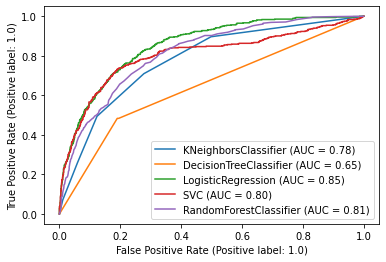

In [232]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC,x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

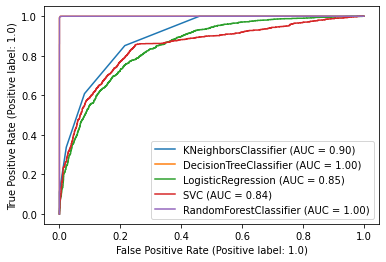

In [233]:
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(DTC,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [234]:
auc_score = roc_auc_score(y_test,y_test)
print(auc_score)

1.0


# Tunning

In [235]:
from sklearn.model_selection import GridSearchCV

In [240]:
grid_param={'max_depth':range(3,8),
            'criterion': {'friedman_mse', 'mse', 'mae'},
           'min_samples_split':range(2,8,2)
            'n_estimators'=(100,200),
           }#'learing_rate':np.arange(0.1,0.3)

In [241]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

In [242]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 8, 2)})

In [243]:
grid.best_params_

{'max_depth': 3, 'min_samples_split': 4}

In [258]:
gbdt_clf=GradientBoostingClassifier(max_depth= 2, min_samples_split= 6,n_estimators=250,criterion='mse')
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)

gbdt_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

print('\n==================Train Result=============')
print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{gbdt_clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_train,pred)}\n")
#******************* Test SCore**********************
pred=gbdt_clf.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print('***********test results***********')
print(f'Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%')
print('-----------------------------------------')
print(f"Classification Report:\n{clf_report}")
print('----------------------------------')
print(f"confusion matrix:\n{confusion_matrix(y_test,pred)}\n")


==================Train Result=============
Accuracy Score:83.83%
-----------------------------------------
Classification Report:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.858355     0.756497  0.838319     0.807426      0.831608
recall        0.935045     0.566691  0.838319     0.750868      0.838319
f1-score      0.895060     0.647980  0.838319     0.771520      0.830179
support    3895.000000  1387.000000  0.838319  5282.000000   5282.000000
----------------------------------
confusion matrix:
[[3642  253]
 [ 601  786]]

***********test results***********
Accuracy Score:80.41%
-----------------------------------------
Classification Report:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.831676    0.694051  0.804089     0.762864      0.794007
recall        0.915559    0.508299  0.804089     0.711929      0.804089
f1-score      0.871604    0.586826  0.804089     0.729215      0.793658
support    1

In [259]:
print('gbdt_CSV --> ',gbdt_csv)

gbdt_CSV -->  0.805620970341715


Without tunning we got better result 

In [260]:
import pickle

In [262]:
pickle.dump(gbdt_csv ,open('Customer Churn Analysis','wb'))